In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA

In [71]:
sys.path.append('..')

In [72]:
from functions.select_cols_functions import *

In [73]:
df = pd.read_csv('../../data/train.csv')
df = apply_all_rules(df)

In [74]:
y = df['AdoptionSpeed']
df = df.drop(columns=['AdoptionSpeed'])

In [75]:
df

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,2932,0,1.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,1113,0,2.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,5485,0,7.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,3232,0,8.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,3297,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,2193,0,3.0
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,666,0,3.0
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,2480,0,5.0
14991,2,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,4291,0,3.0


### KMeans

In [76]:
# Inicializando listas para armazenar as métricas
inertia = []
silhouette_scores = []
K = range(2, 11)  # Testando de 2 a 10 clusters

# Aplicando KMeans e calculando as métricas
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    
    # Armazenando a inércia
    inertia.append(kmeans.inertia_)
    
    # Calculando e armazenando o Silhouette Score
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Encontrando o melhor número de clusters baseado no Silhouette Score
best_k = K[silhouette_scores.index(max(silhouette_scores))]

### Melhor agrupamento de clusters

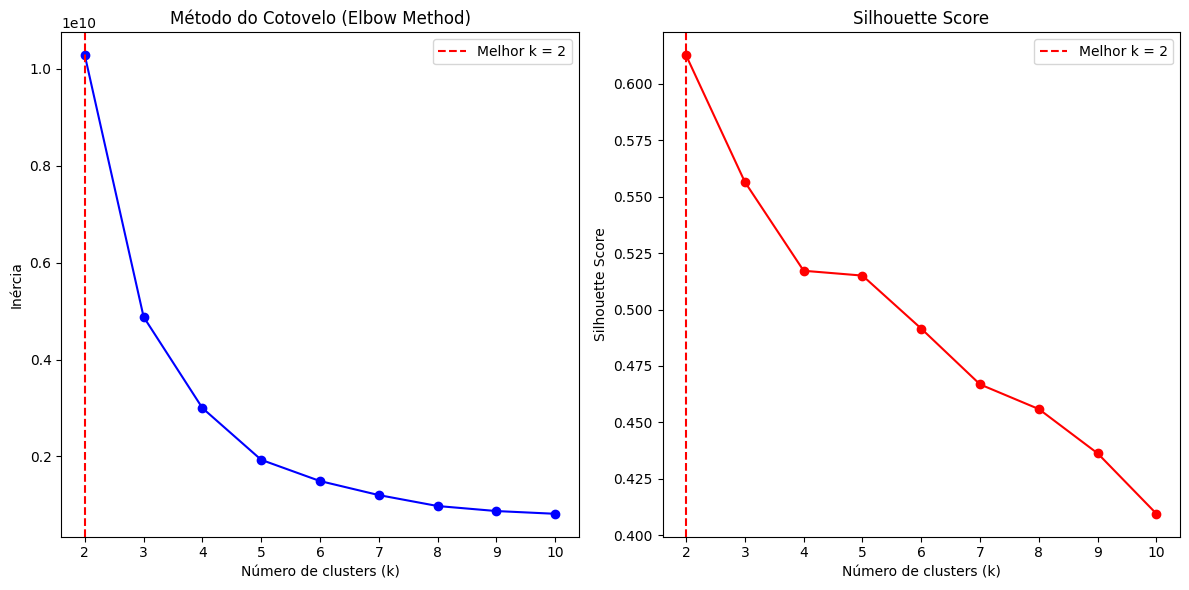

In [77]:
# Plotando os resultados
plt.figure(figsize=(12, 6))

# Gráfico do Método do Cotovelo (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Melhor k = {best_k}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo (Elbow Method)')
plt.legend()

# Gráfico do Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Melhor k = {best_k}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

### Treinando KMeans com a melhor quantidade de clusters

In [78]:
# Treinando o KMeans com o melhor número de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

In [79]:
df['AdoptionSpeed'] = y

### Distribuição dos targets em cada cluster

<Figure size 1200x600 with 0 Axes>

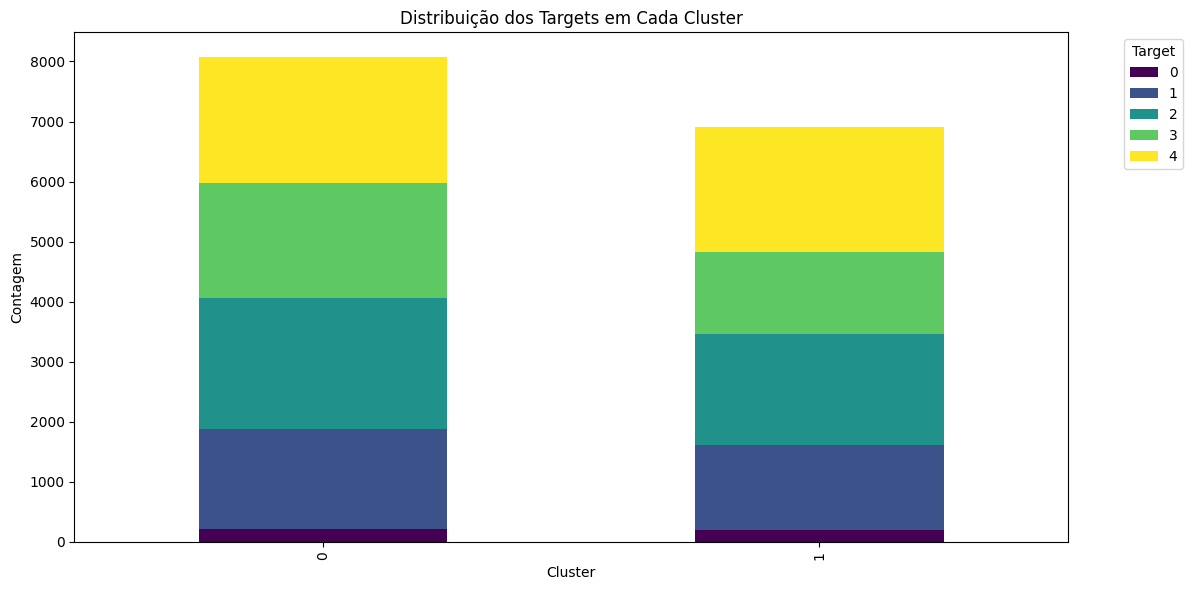

In [80]:
# Visualizando a comparação entre clusters e target
plt.figure(figsize=(12, 6))

# Gráfico de barras para a distribuição dos targets em cada cluster
cluster_target_counts = df.groupby(['cluster', 'AdoptionSpeed']).size().unstack(fill_value=0)
cluster_target_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Distribuição dos Targets em Cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### PCA distribuição das classes

In [88]:
# Redução de dimensionalidade usando PCA
pca = PCA(n_components=2)
df['pca1'] = pca.fit_transform(df)[:, 0]
df['pca2'] = pca.fit_transform(df)[:, 1]

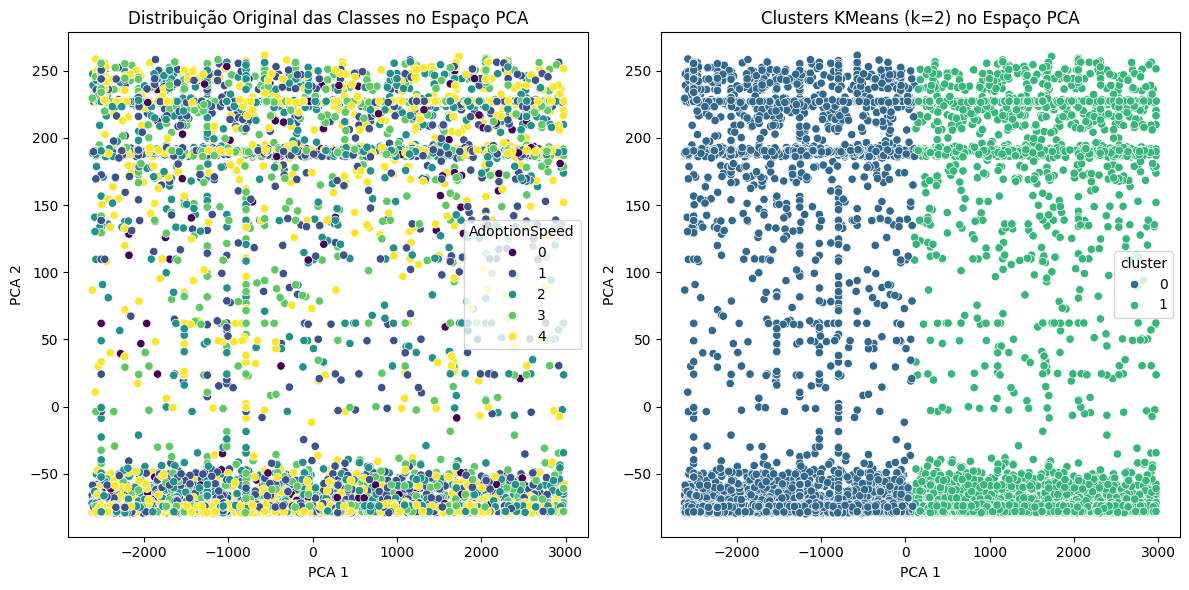

In [90]:
# Visualizando a distribuição das classes no espaço PCA
plt.figure(figsize=(12, 6))

# Gráfico de dispersão das classes originais
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='pca1', y='pca2', hue='AdoptionSpeed', palette='viridis', legend='full')
plt.title('Distribuição Original das Classes no Espaço PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Gráfico de dispersão dos clusters KMeans
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', legend='full')
plt.title(f'Clusters KMeans (k={best_k}) no Espaço PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

### distribuição de AdoptionSpeed em cada cluster

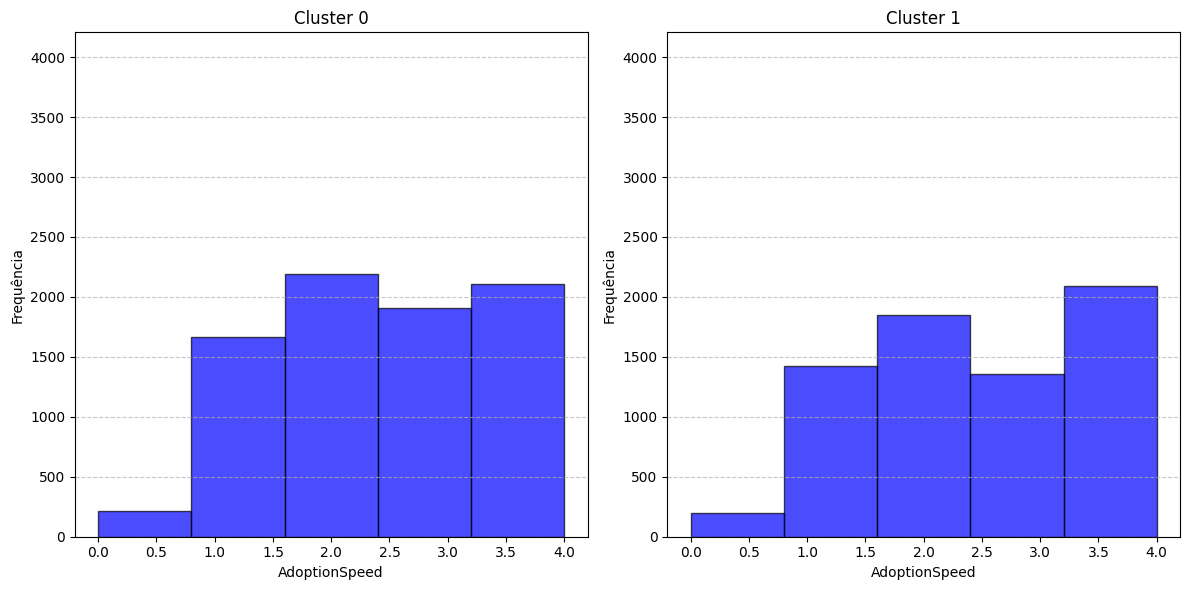

In [98]:
# Plotando histogramas para comparar a distribuição de AdoptionSpeed em cada cluster
plt.figure(figsize=(12, 6))

for cluster in range(best_k):
    plt.subplot(1, best_k, cluster + 1)
    cluster_data = df[df['cluster'] == cluster]
    plt.hist(cluster_data['AdoptionSpeed'], bins=5, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Cluster {cluster}')
    plt.xlabel('AdoptionSpeed')
    plt.ylabel('Frequência')
    plt.ylim(0, df['AdoptionSpeed'].value_counts().max() + 10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()